In [216]:
import h5py
from matplotlib import pyplot as plt
from time import sleep
import numpy as np
import cv2

filename = r"test_files\test.h5py"
with h5py.File(filename, "r") as f:

    frames = f.get("frameN")[:]
    depth = f.get("depth")[:]
    color = f.get("color")[:]
    infrared = f.get("infrared")[:]

    num_of_imgs = frames.shape[0]

    print(f'There are {num_of_imgs} images')
    print(f"Starting at frame {frames[0]}\nFrames array {frames}")


There are 30 images
Starting at frame 2
Frames array [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]


In [217]:
# live stream color imgs in slow motion
for i in range(num_of_imgs):
    if color[i] is not None:
        sleep(.1)
        cv2.imshow("Color", color[i])

    key = cv2.waitKey(10)
    if key != -1:
        cv2.destroyAllWindows()
cv2.destroyAllWindows()


Depth Mean is (480, 640)
Depth STD is (480, 640)
Color Mean is (540, 960, 3)
Color STD is (540, 960, 3)


Text(0.5, 1.0, 'Var depth image ')

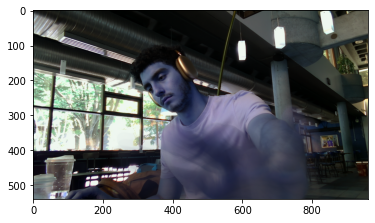

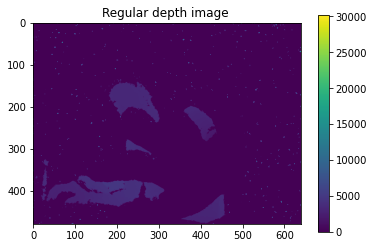

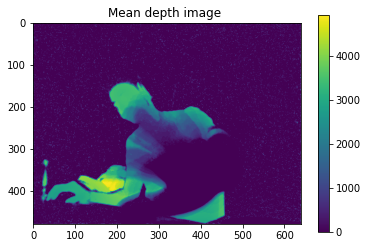

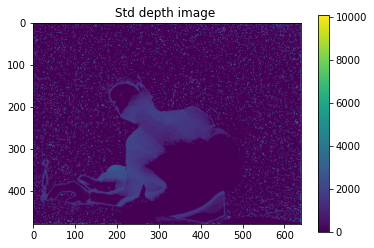

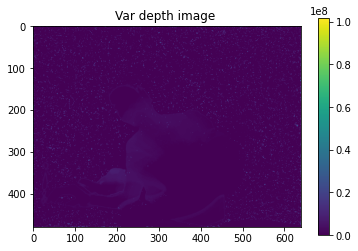

In [294]:
depth_mean = np.mean(depth, axis = 0, dtype=np.float64)
depth_std_np = np.std(depth, axis = 0, dtype=np.float64)
depth_var_np = np.var(depth, axis = 0, dtype=np.float64)


print(f"Depth Mean is {depth_mean.shape}")
print(f"Depth STD is {depth_std_np.shape}")


plt.figure()
plt.imshow(depth[0])
plt.colorbar()
plt.title("Regular depth image ")

plt.figure()
plt.imshow(depth_mean)
plt.colorbar()
plt.title("Mean depth image ")

plt.figure()
plt.imshow(depth_std_np)
plt.colorbar()
plt.title("Std depth image ")

plt.figure()
plt.imshow(depth_var_np)
plt.colorbar()
plt.title("Var depth image ")

Text(0.5, 1.0, 'Var infrared image ')

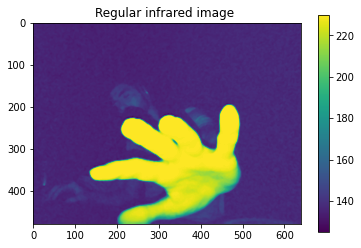

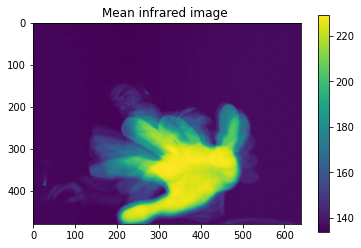

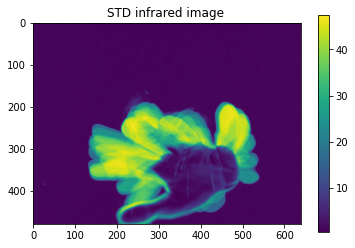

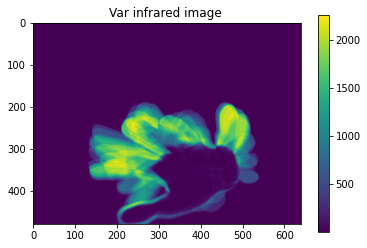

In [ ]:
infrared_mean =  np.mean(infrared, axis=0, dtype=np.float64)
infrared_std_np =  np.std(infrared, axis=0, dtype=np.float64)
infrared_var_np =  np.var(infrared, axis=0, dtype=np.float64)


plt.figure()
plt.imshow(infrared[0])
plt.colorbar()
plt.title("Regular infrared image ")

plt.figure()
plt.imshow(infrared_mean)
plt.colorbar()
plt.title("Mean infrared image ")

plt.figure()
plt.imshow(infrared_std_np)
plt.colorbar()
plt.title("STD infrared image ")

plt.figure()
plt.imshow(infrared_var_np)
plt.colorbar()
plt.title("Var infrared image ")

Text(0.5, 1.0, 'Var color image ')

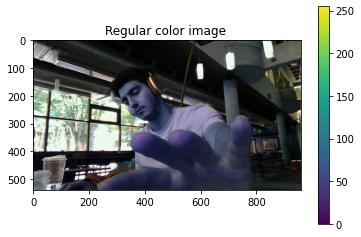

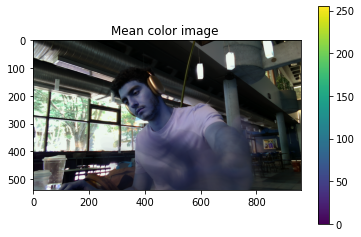

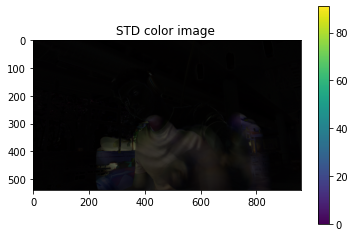

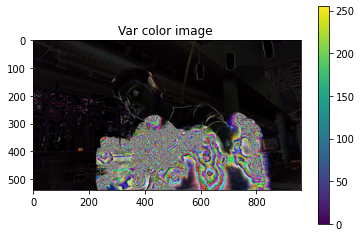

In [295]:
color_mean =  np.mean(color, axis = 0, dtype=np.float64)
color_std_np =  np.std(color, axis = 0, dtype=np.float64)
color_var_np =  np.var(color, axis = 0, dtype=np.float64)

# print(f"Color Mean is {color_mean.shape}")
# print(f"Color STD is {color_std_np.shape}")

plt.figure()
plt.imshow(color[0])
plt.colorbar()
plt.title("Regular color image ")

plt.figure()
plt.imshow(color_mean.astype('uint8'))
plt.colorbar()
plt.title("Mean color image ")

plt.figure()
plt.imshow(color_std_np.astype('uint8'))
plt.colorbar()
plt.title("STD color image ")

plt.figure()
plt.imshow(color_var_np.astype('uint8'))
plt.colorbar()
plt.title("Var color image ")

In [ ]:
depth =  np.mean(depth, axis = 1, dtype=np.float64)


In [ ]:
print(depth_std_np.shape)


(480, 640)


In [ ]:
row_c = color[0].shape[0]
col_c = color[0].shape[1]
rgb = color[0].shape[2]

color_mean = np.mean(color, dtype=np.float32)
color_mean_array = [] 

print(color_mean)
mean = 0
color_std_sum = 0
for i in range(num_of_imgs): # iterate through all the images 
    sum = 0
    for r in range(row_c): # iterate over each row of pixels 
        for c in range(col_c): # iterate over each column of pixels 
            for byte in range(rgb): # iterate over each rgb value 
                sum += color[i][r][c][byte] # add sum of each byte 
   
    photo_mean = sum / (row_c * col_c * rgb)
    color_mean_array.append(photo_mean)

    color_std_sum += ((color_mean - photo_mean) ** 2)
    mean += photo_mean

color_std = ((color_std_sum / num_of_imgs) ** (0.5))

total_mean = mean / num_of_imgs
print(f"Color Mean is {total_mean:.6f}")
print(f'Color STD is {color_std:.6f}')

75.76443


KeyboardInterrupt: 

In [ ]:
row_d = depth[0].shape[0]
col_d = depth[0].shape[1]
depth_std_sum = 0
infrared_std_sum = 0

infrared_mean_array = []
depth_mean_array = []

for i in range(num_of_imgs): # iterate through all the images 
    infrared_sum = 0
    depth_sum = 0

    infrared_photo_mean = 0
    depth_photo_mean = 0

    for r in range(row_d): # iterate over each row of pixels 
        for c in range(col_d): # iterate over each column of pixels 
            infrared_sum += infrared[i][r][c]
            depth_sum += depth[i][r][c]
            
    infrared_photo_mean = infrared_sum / (row_d * col_d)
    depth_photo_mean = depth_sum / (row_d * col_d)

    infrared_mean_array.append(infrared_photo_mean)
    depth_mean_array.append(depth_photo_mean)

infrared_std_sum += ((infrared_mean - infrared_photo_mean) ** 2)
depth_std_sum += ((depth_mean - depth_photo_mean) ** 2)

depth_std = ((depth_std_sum / num_of_imgs) ** (0.5))
infarre_std = ((infrared_std_sum / num_of_imgs) ** (0.5))

In [ ]:
import statistics
color_median = statistics.median(color_mean_array)
depth_median = statistics.median(depth_mean_array)
infrared_median = statistics.median(infrared_mean_array)

print(f"Color median is {color_median}")
print(f"Depth median is {depth_median}")
print(f"Infrared median is {infrared_median} \n")

depth_std_sum = 0
infrared_std_sum = 0
color_std_sum = 0

# iterates through through each photos mean and calulates the first part of std formula
for i in range(num_of_imgs):
    color_std_sum += (color_mean - color_mean_array[i]) ** 2
    infrared_std_sum += (infrared_mean - depth_mean_array[i]) ** 2
    depth_std_sum += (depth_mean - infrared_mean_array[i]) ** 2

color_variance = (color_std_sum / (num_of_imgs -1))
infrared_variance = (infrared_std_sum / (num_of_imgs -1))
depth_variance = (depth_std_sum / (num_of_imgs -1))

color_std = ((color_std_sum / num_of_imgs ) ** (0.5))
depth_std = ((depth_std_sum / num_of_imgs ) ** (0.5))
infrared_std = ((infrared_std_sum / num_of_imgs ) ** (0.5))

print(f'Color STD is {color_std}')
print(f'Depth STD is {depth_std}')
print(f'Infrared STD is {infrared_std}\n')

print(f'Color Varience is {color_variance}')
print(f'Depth Varience is {infrared_variance}')
print(f'Infrared Varience is {depth_variance}')



Color median is 76.55848894032923
Depth median is 364.0968603515625
Infrared median is 149.310029296875 

Color STD is 2.1961626913254597
Depth STD is [[4364.1329283   295.13490333  423.60092758 ...  196.13597254
   944.60011356 1481.633207  ]
 [1585.63317932  733.60030392  149.67139201 ...  149.67139201
   149.67139201  944.60011356]
 [1153.53332702  355.20121178  352.83455692 ...  149.67139201
   149.67139201  149.67139201]
 ...
 [1005.33340691   96.73924777  149.67139201 ...  149.67139201
   149.67139201  149.67139201]
 [ 504.66735717  759.0002754   149.67139201 ...  149.67139201
   149.67139201  149.67139201]
 [3151.56631675   69.34180152  517.20066049 ...  149.67139201
   149.67139201 1005.93340654]]
Infrared STD is [[240.99789597 241.06327365 241.39017263 ... 239.98463264 240.01731588
  240.14805064]
 [241.03058473 241.12865204 241.35748194 ... 240.21341909 240.24610359
  240.21341909]
 [241.19403113 241.19403113 241.35748194 ... 240.31147311 240.27878826
  240.18073478]
 ...
 [2

In [ ]:
import numpy as np
import statistics
RGB = 3
class Computation:
    
    def __init__(self, frame_array, frame_type, rgb):
        self.frame_array = frame_array
        self.num_of_imgs = frame_array.shape[0]
        self.row = frame_array.shape[1]
        self.col = frame_array.shape[2]
        self.rgb = rgb
        self.frame_type = frame_type
        self.photo_mean_array = self.mean_array_np()
        self.mean =  np.mean(frame_array, dtype=np.float64)
        self.std = self.std()
        self.variance = self.variance()
        self.median = self.median()
        self.max = self.max()
        self.min = self.min()
        
    def mean_array(self):
        mean = 0
        mean_array = []
        for i in range(num_of_imgs): # iterate through all the images 
            sum = 0
            
            for r in range(row_c): # iterate over each row of pixels 
                
                for c in range(col_c): # iterate over each column of pixels 

                    if self.rgb == True:
                        for byte in range(RGB): # iterate over each rgb value 
                            sum += color[i][r][c][byte] # add sum of each byte 
                   
                    else:
                        sum += color[i][r][c]
            photo_mean = sum / (row_c * col_c * RGB)
            mean_array.append(photo_mean)
            mean += photo_mean
        mean /= num_of_imgs
        
        return mean_array

    def mean_array_np(self):
        mean_array = []
        sum = 0
        for i in range(self.num_of_imgs):
            photo_mean = np.mean(self.frame_array[i], dtype=np.float64)
            mean_array.append(photo_mean)
        return mean_array

    def std(self):
        sum = 0
        std = 0

        # iterates through through each photos mean and calulates the first part of std formula
        for i in range(self.num_of_imgs):
            sum += (self.mean - self.photo_mean_array[i]) ** 2
        std = ((sum / self.num_of_imgs ) ** (0.5))
        return std
    
    def median(self):
        median = statistics.median(self.photo_mean_array)
        return median
        
    def variance(self):
        sum = 0
        for i in range(self.num_of_imgs):
            sum += (self.mean - self.photo_mean_array[i]) ** 2
        variance = (sum / (self.num_of_imgs -1))
        return variance

    def max(self):
        return max(self.photo_mean_array)

    def min(self):
        return min(self.photo_mean_array)
    
    def print_computation(self):
        print(f"{self.frame_type} Mean is {self.mean}")
        print(f"{self.frame_type} STD is {self.std}")
        print(f"{self.frame_type} Variance is {self.variance}")
        print(f"{self.frame_type} Median is {self.median}")
        print(f"{self.frame_type} Min is {self.min}")
        print(f"{self.frame_type} Max is {self.max}")

In [ ]:
color_computation = Computation(frame_array = color, frame_type = "Color", rgb = True)
color_computation.print_computation()

Color Mean is 75.76434289266118
Color STD is 2.196162689707818
Color Variance is 4.9894454065496685
Color Median is 76.55848894032923
Color Min is 72.00328060699589
Color Max is 78.68883487654321


In [ ]:
depth_computation = Computation(frame_array = depth, frame_type = "Depth", rgb = False)
depth_computation.print_computation()

Depth Mean is 372.20363671875
Depth STD is 47.168023605291744
Depth Variance is 2301.5404663751992
Depth Median is 364.0968603515625
Depth Min is 308.734677734375
Depth Max is 480.56481770833335


In [ ]:
infrared_computation = Computation(frame_array = infrared, frame_type = "Infrared", rgb = False)
infrared_computation.print_computation()

Infrared Mean is 149.66721495225696
Infrared STD is 1.118192782713201
Infrared Variance is 1.293470792391612
Infrared Median is 149.310029296875
Infrared Min is 148.07162109375
Infrared Max is 151.829619140625
